# Regreesion model For Food demand

In [1]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pk
import seaborn as sns

In [2]:
# import food dataset
train = pd.read_csv("Food_train.csv")
test = pd.read_csv("FoodTest.csv")

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
train.shape

(456548, 9)

In [6]:
test.shape

(32573, 8)

In [7]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [8]:
#import centre dataset
centreDF = pd.read_csv("center.csv")
centreDF.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [9]:
#Prepare main dataset DF by mergeing centre dataset and Meal dataset
train = pd.merge(train,centreDF, on=['center_id'])
test = pd.merge(test,centreDF, on=['center_id'])

In [10]:
#import centre dataset
mealDF = pd.read_csv("meal.csv")
mealDF.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [11]:
mealDF['combo'] = mealDF['category'] +" "+ mealDF['cuisine']
mealDF.head()

,meal_id,category,cuisine,combo
0,1885,Beverages,Thai,Beverages Thai
1,1993,Beverages,Thai,Beverages Thai
2,2539,Beverages,Thai,Beverages Thai
3,1248,Beverages,Indian,Beverages Indian
4,2631,Beverages,Indian,Beverages Indian


In [12]:
#Prepare main dataset Flatten dataset DF by mergeing centre dataset and Meal dataset
train = pd.merge(train,mealDF, on=['meal_id'])
test = pd.merge(test,mealDF, on=['meal_id'])

In [13]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,combo
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,Beverages Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,Beverages Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,Beverages Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,Beverages Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,Beverages Thai


In [14]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine,combo
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,Beverages Thai
1,1262649,147,55,1885,159.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,Beverages Thai
2,1453211,149,55,1885,157.14,158.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,Beverages Thai
3,1262599,150,55,1885,159.14,157.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai,Beverages Thai
4,1495848,151,55,1885,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai,Beverages Thai


In [15]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [16]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
combo                    0
dtype: int64

In [17]:
test.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
combo                    0
dtype: int64

In [18]:
#Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
train.corr()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002909,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,0.028614,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.000604,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.002605,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.953389,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
base_price,0.002909,0.028614,0.000604,0.002605,0.953389,1.000000,0.171173,0.057156,-0.222306,-0.002054,-0.001934,0.018031
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,0.171173,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.057156,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,-0.222306,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.002054,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476


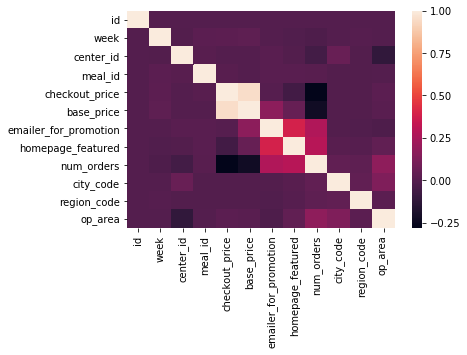

In [19]:
sns.heatmap(train.corr())

In [20]:
train['discount'] = train['base_price']-train['checkout_price']
train['discount_per'] = (train['discount']/train['base_price'])*100
train['op_dis'] = train['discount_per']*train['op_area']
train['promo_homepage'] = train['emailer_for_promotion'] + train['homepage_featured']
train['center_id'] = train['center_id'].astype(np.object)
train['meal_id'] = train['meal_id'].astype(np.object)
train['city_code'] = train['city_code'].astype(np.object)
train['region_code'] = train['region_code'].astype(np.object)

train = pd.get_dummies(train,drop_first=True)

In [21]:
train.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,op_area,discount,discount_per,...,combo_Fish Continental,combo_Other Snacks Thai,combo_Pasta Italian,combo_Pizza Continental,combo_Rice Bowl Indian,combo_Salad Italian,combo_Sandwich Italian,combo_Seafood Continental,combo_Soup Thai,combo_Starters Thai
0,1379560,1,136.83,152.29,0,0,177,2.0,15.46,10.151684,...,0,0,0,0,0,0,0,0,0,0
1,1018704,2,135.83,152.29,0,0,323,2.0,16.46,10.808326,...,0,0,0,0,0,0,0,0,0,0
2,1196273,3,132.92,133.92,0,0,96,2.0,1.00,0.746714,...,0,0,0,0,0,0,0,0,0,0
3,1116527,4,135.86,134.86,0,0,163,2.0,-1.00,-0.741510,...,0,0,0,0,0,0,0,0,0,0
4,1343872,5,146.50,147.50,0,0,215,2.0,1.00,0.677966,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test['discount'] = test['base_price'] - test['checkout_price']
test['discount_per'] = (test['discount']/test['base_price'])*100
test['op_dis'] = test['discount_per']*test['op_area']
test['promo_homepage'] = test['emailer_for_promotion'] + test['homepage_featured']
test['center_id'] = test['center_id'].astype(np.object)
test['meal_id'] = test['meal_id'].astype(np.object)
test['city_code'] = test['city_code'].astype(np.object)
test['region_code'] = test['region_code'].astype(np.object)

test = pd.get_dummies(test,drop_first=True)
test.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,op_area,center_type_TYPE_B,center_type_TYPE_C,category_Biryani,...,city_code_702,city_code_703,city_code_713,region_code_34,region_code_35,region_code_56,region_code_71,region_code_77,region_code_85,region_code_93
0,1028232,146,158.11,159.11,0,0,2.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,1262649,147,159.11,159.11,0,0,2.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1453211,149,157.14,158.14,0,0,2.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1262599,150,159.14,157.14,0,0,2.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,1495848,151,160.11,159.11,0,0,2.0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
# Splitting the dataset into train and test 
from sklearn.model_selection import StratifiedKFold,train_test_split

X = train.drop(['id','num_orders'],axis=1)
y = train.num_orders
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 1994)

In [25]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)

C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ADMIN\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
meanX = sc_X.mean_
varX = sc_X.var_

In [27]:
meanX

array([7.47881961e+01, 3.32133426e+02, 3.53932848e+02, 8.03186814e-02,
       1.08699779e-01, 4.08451685e+00, 2.17994218e+01, 5.69875588e+00,
       2.31709686e+01, 1.89018460e-01, 1.50316433e-02, 1.54025426e-02,
       1.30749304e-02, 1.39335477e-02, 1.46315393e-02, 1.39831956e-02,
       1.16818677e-02, 1.11357404e-02, 1.49527907e-02, 1.18249706e-02,
       1.44767545e-02, 1.31304193e-02, 1.30428053e-02, 1.48739380e-02,
       1.19067437e-02, 8.86945805e-03, 1.28033270e-02, 1.53120081e-02,
       1.28646568e-02, 1.50404047e-02, 1.54930770e-02, 1.41759465e-02,
       1.13080479e-02, 9.76312093e-03, 1.15183215e-02, 1.47337556e-02,
       1.27127925e-02, 1.22659611e-02, 1.30749304e-02, 1.34545911e-02,
       1.51192573e-02, 1.29201457e-02, 1.36999103e-02, 1.21140968e-02,
       1.16117765e-02, 1.30603281e-02, 1.33027268e-02, 1.16117765e-02,
       1.41525827e-02, 1.27478381e-02, 1.33056473e-02, 1.28763387e-02,
       1.22864044e-02, 1.46841077e-02, 7.54940700e-03, 1.02742026e-02,
      

In [28]:
varX

array([1.72481596e+03, 2.33833182e+04, 2.57867189e+04, 7.38675908e-02,
       9.68841370e-02, 1.19260828e+00, 2.33209034e+03, 1.28535518e+02,
       2.30888030e+03, 2.36576358e-01, 1.48056930e-02, 1.51653042e-02,
       1.29039766e-02, 1.37394039e-02, 1.44174573e-02, 1.37876659e-02,
       1.15454017e-02, 1.10117357e-02, 1.47292047e-02, 1.16851406e-02,
       1.42671781e-02, 1.29580114e-02, 1.28726905e-02, 1.46527040e-02,
       1.17649731e-02, 8.79079076e-03, 1.26394018e-02, 1.50775505e-02,
       1.26991574e-02, 1.48141909e-02, 1.52530416e-02, 1.39749890e-02,
       1.11801760e-02, 9.66780240e-03, 1.13856498e-02, 1.45166721e-02,
       1.25511774e-02, 1.21155073e-02, 1.29039766e-02, 1.32735651e-02,
       1.48906653e-02, 1.27532155e-02, 1.35122228e-02, 1.19673455e-02,
       1.14769431e-02, 1.28897559e-02, 1.31257643e-02, 1.14769431e-02,
       1.39522871e-02, 1.25853307e-02, 1.31286071e-02, 1.27105386e-02,
       1.21354486e-02, 1.44684847e-02, 7.49241345e-03, 1.01686434e-02,
      

In [29]:
X_train

array([[-1.12658748, -1.11880621, -0.87495776, ..., -0.24949965,
        -0.16903618, -0.26520193],
       [ 1.04047348, -0.06581014, -0.20464784, ..., -0.24949965,
        -0.16903618, -0.26520193],
       [ 0.96823812, -0.2622578 , -0.38548953, ..., -0.24949965,
        -0.16903618, -0.26520193],
       ...,
       [-0.50054765, -0.03428958, -0.16217744, ..., -0.24949965,
        -0.16903618, -0.26520193],
       [ 0.31811983, -0.1353908 , -0.27713397, ..., -0.24949965,
        -0.16903618, -0.26520193],
       [-0.16344927, -0.03428958, -0.16840477, ..., -0.24949965,
        -0.16903618, -0.26520193]])

In [30]:
X_test = sc_X.transform(X_test)
X_test

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 1.54612104, -1.55649735, -1.24342894, ..., -0.24949965,
        -0.16903618, -0.26520193],
       [ 1.52204258, -1.14417961, -0.92913554, ..., -0.24949965,
        -0.16903618, -0.26520193],
       [ 0.60706129, -0.33223083, -0.45212197, ..., -0.24949965,
        -0.16903618,  3.77071169],
       ...,
       [ 0.60706129, -1.18204353, -1.26759098, ..., -0.24949965,
        -0.16903618, -0.26520193],
       [-0.06713545, -0.2622578 , -0.38548953, ..., -0.24949965,
        -0.16903618, -0.26520193],
       [ 1.37757185, -0.35740805, -0.48855186, ..., -0.24949965,
        -0.16903618, -0.26520193]])

In [38]:
test = sc_X.transform(test)

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


ValueError: operands could not be broadcast together with shapes (32573,228) (227,) (32573,228) 

In [31]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(n_jobs=-1)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [32]:
b1 = regressor.coef_
b0 = regressor.intercept_

In [33]:
b1

array([-2.90923287e+00, -1.84403217e+13,  1.93648201e+13, -5.81690910e+13,
       -6.66180088e+13,  3.61588314e+13, -5.82355401e+12,  3.43072620e+01,
        6.45073643e+01,  1.04100060e+14,  8.51940953e+11, -1.63098900e+12,
       -3.43724063e+14, -1.60627139e+13,  2.47421451e+14,  2.22170400e+14,
        3.27579387e+13, -3.72218076e+13,  9.70370507e+14, -1.07157779e+14,
        1.07967398e+13, -1.50135200e+13, -1.09406938e+13, -1.46121990e+13,
       -1.06804930e+14, -7.15532835e+13, -2.84008504e+14, -2.00423379e+12,
       -1.67173113e+14,  1.38033571e+14, -6.38939861e+12,  3.15887699e+12,
        8.20321621e+12,  9.16962576e+13, -9.45596473e+12,  1.31602129e+13,
        4.80450633e+13, -1.64382929e+14,  1.89346956e+14,  4.51446545e+13,
        1.45229627e+14,  1.04265049e+14,  4.46296038e+13, -2.55644819e+13,
        2.55404640e+14, -1.40848630e+13,  3.07819989e+13,  9.39693625e+13,
       -9.63121999e+13, -1.55389413e+13,  6.97816625e+13,  1.31479445e+13,
       -1.56234306e+13,  

In [34]:
b0

261.4113199588893

In [35]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([186.09881996, 156.47381996,  78.66131996, ..., 734.56756996,
       406.38006996, -37.40118004])

[186.09881996 156.47381996  78.66131996 ... 734.56756996 406.38006996
 -37.40118004]


In [39]:
lr_results = regressor.predict(test)

ValueError: shapes (32573,228) and (227,) not aligned: 228 (dim 1) != 227 (dim 0)